#### Import of Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [6]:
df = pd.read_csv('datasets/wisconsin.csv')
df = df.drop(columns=['BareNuclei'])



In [7]:
df.head(5)

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,EpithelialSize,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


In [8]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ClumpThickness    699 non-null    int64
 1   CellSize          699 non-null    int64
 2   CellShape         699 non-null    int64
 3   MarginalAdhesion  699 non-null    int64
 4   EpithelialSize    699 non-null    int64
 5   BlandChromatin    699 non-null    int64
 6   NormalNucleoli    699 non-null    int64
 7   Mitoses           699 non-null    int64
 8   Class             699 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB
Number of duplicated rows is:  258
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

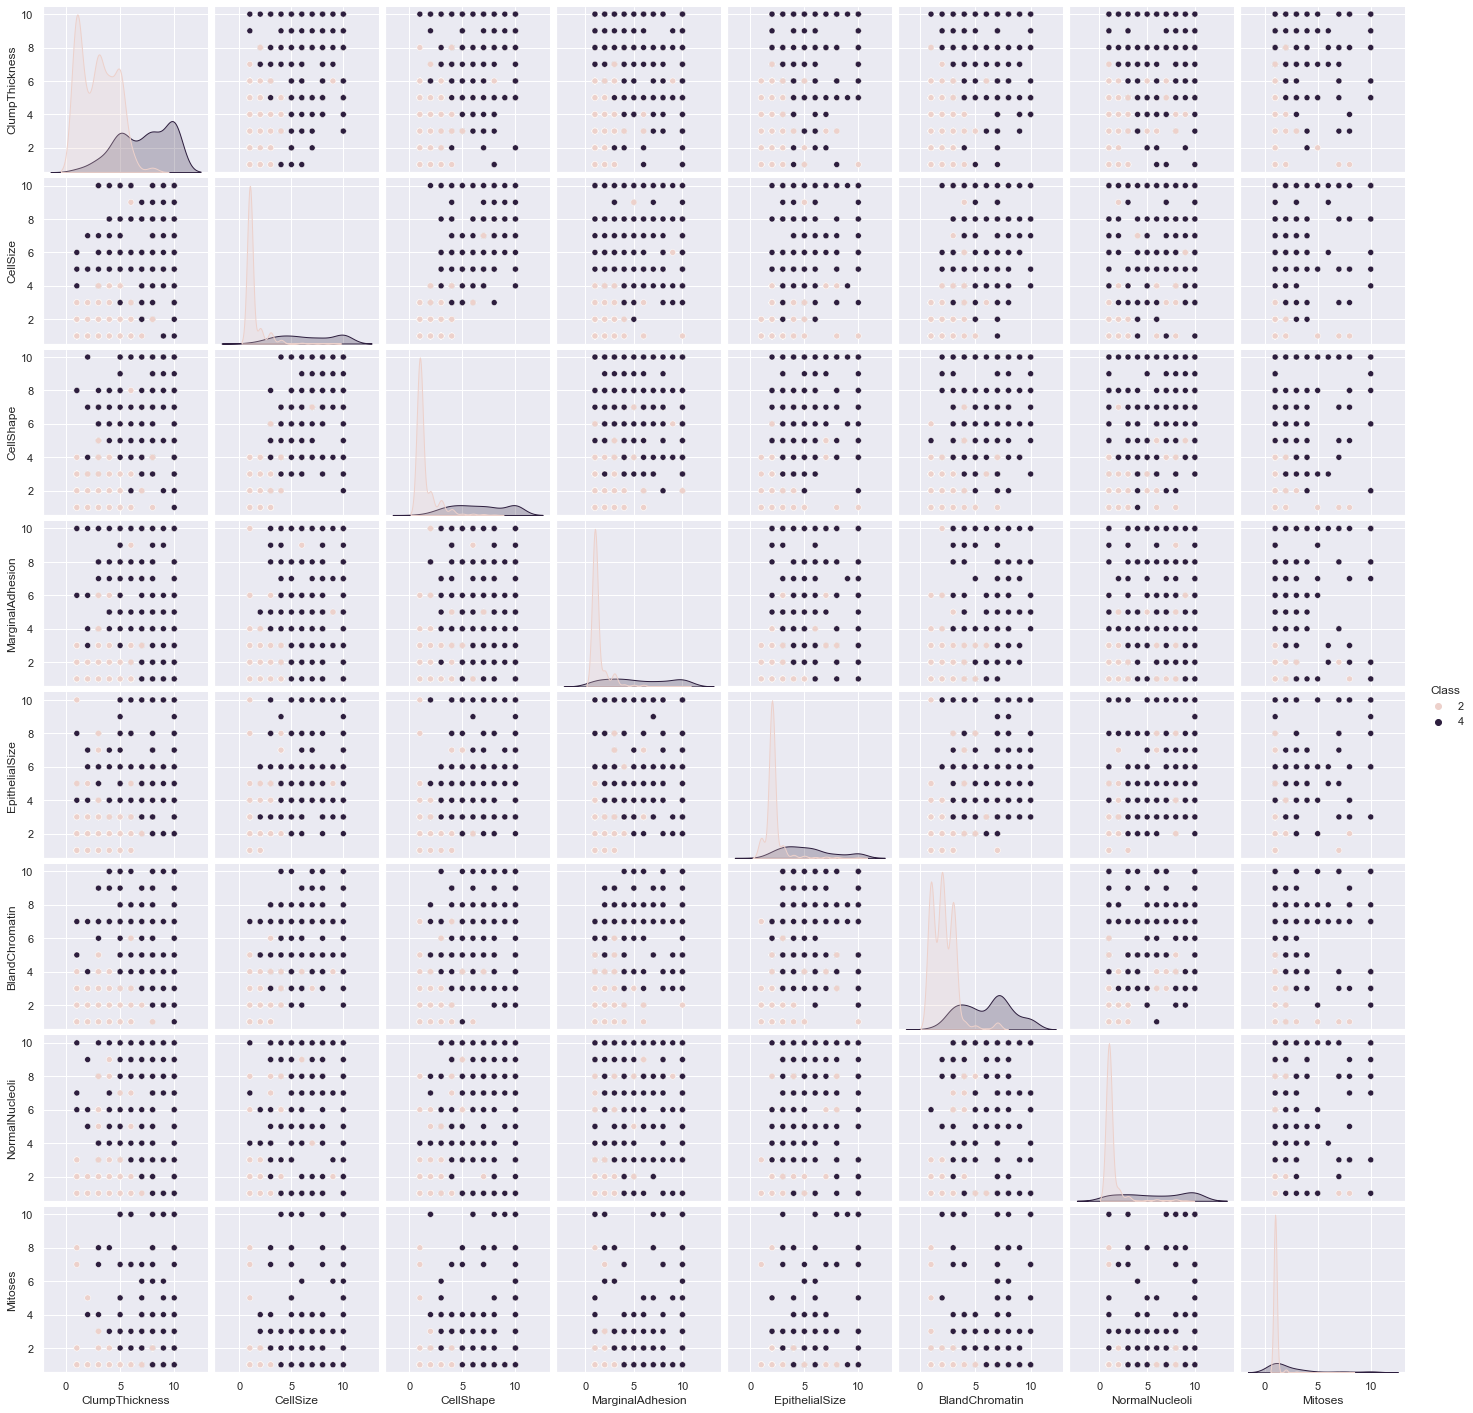

In [9]:
sns.pairplot(df, hue='Class')
plt.show()

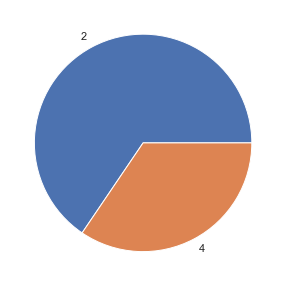

In [10]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [11]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
CellSize,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
CellShape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
MarginalAdhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
EpithelialSize,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
BlandChromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
NormalNucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


#### Standardize the Data

In [12]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,-6.099079e-17,1.000716,-1.214667,-0.859266,-0.148465,0.562336,1.983939
CellSize,699.0,-9.148619e-17,1.000716,-0.699995,-0.699995,-0.699995,0.611792,2.251526
CellShape,699.0,-3.049540e-17,1.000716,-0.743299,-0.743299,-0.743299,0.603599,2.287222
MarginalAdhesion,699.0,6.607336e-17,1.000716,-0.633247,-0.633247,-0.633247,0.418154,2.520955
EpithelialSize,699.0,5.082566e-17,1.000716,-1.001495,-0.549561,-0.549561,0.354305,3.065906
BlandChromatin,699.0,4.066053e-17,1.000716,-1.000471,-0.590067,-0.179662,0.641147,2.693171
NormalNucleoli,699.0,-8.132106e-17,1.000716,-0.611825,-0.611825,-0.611825,0.371315,2.337594
Mitoses,699.0,-8.132106e-17,1.000716,-0.343912,-0.343912,-0.343912,-0.343912,4.907421


#### Observations and Variables

In [13]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

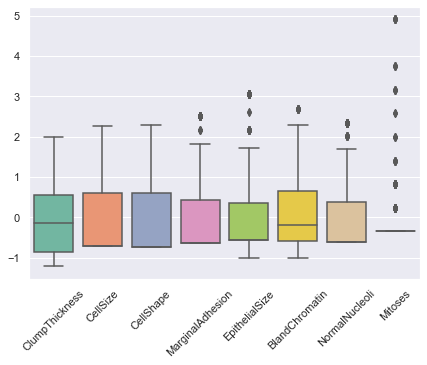

In [14]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

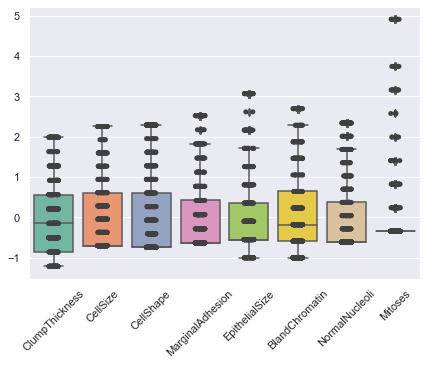

In [15]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

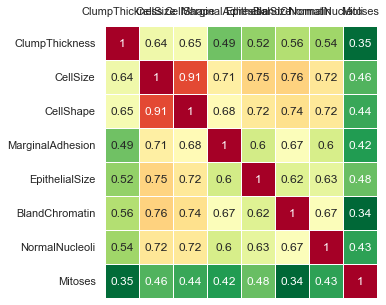

In [16]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [17]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [18]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.304088,-0.148659,-0.574980,0.223761,-0.043164,0.230227
1,0.916752,-0.190742,0.287998,-0.528774,1.433383,-0.616196
2,-1.530546,-0.029081,0.038016,0.055441,-0.070835,0.336816
3,1.549261,-0.785137,-0.619362,-1.105117,-0.818558,-0.211659
4,-1.172750,-0.116595,0.027705,0.599323,0.115253,-0.031765
...,...,...,...,...,...,...
694,-1.679918,0.079387,-0.042779,-0.024917,0.003451,0.034416
695,-1.643775,0.030709,0.344515,-0.028719,-0.084671,0.390111
696,3.706443,-0.075393,1.067731,0.872022,0.298714,-0.548753
697,-1.811182,0.279708,0.785610,0.186128,0.222320,-0.476681


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [98.86%] of the variance'}, xlabel='PC1 (65.9% expl.var)', ylabel='PC2 (9.33% expl.var)'>)

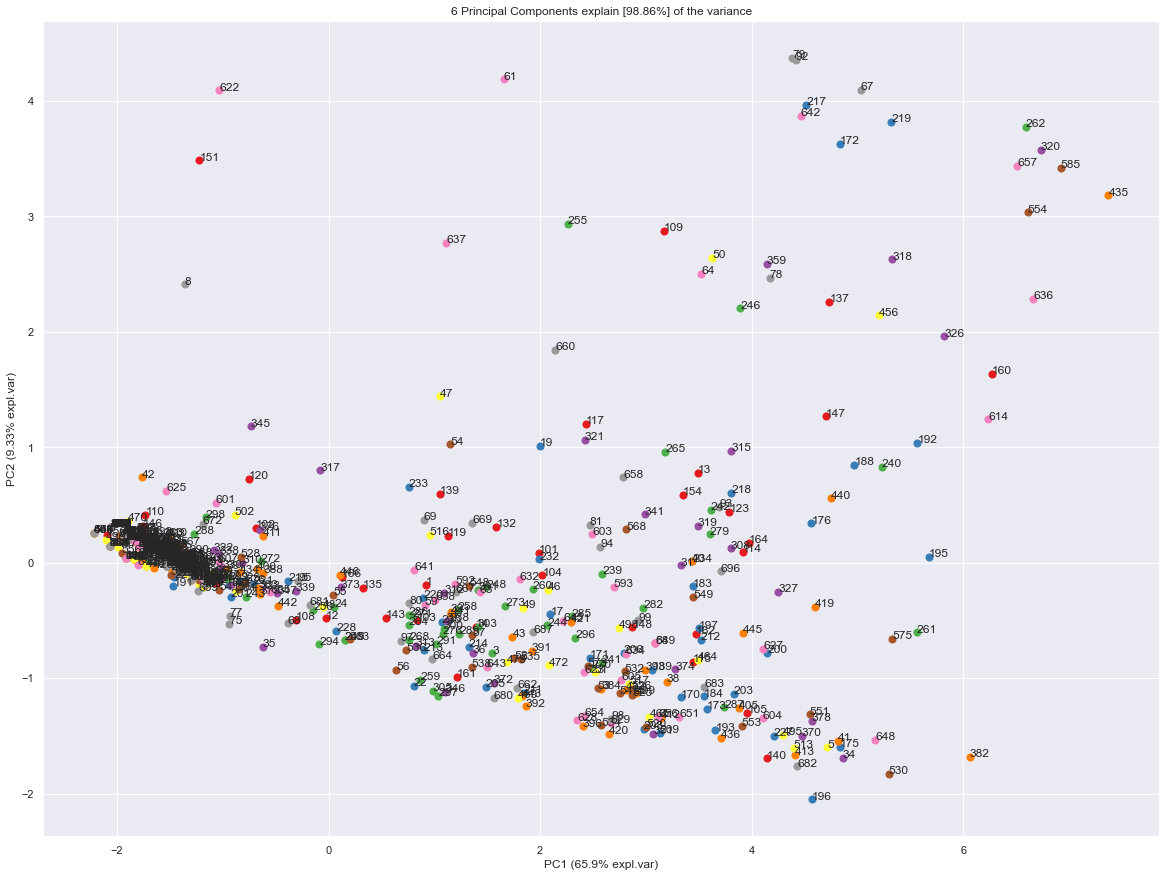

In [19]:
model.scatter(label=True, legend=False)

Eigenvectors

In [20]:
A = out['loadings'].T

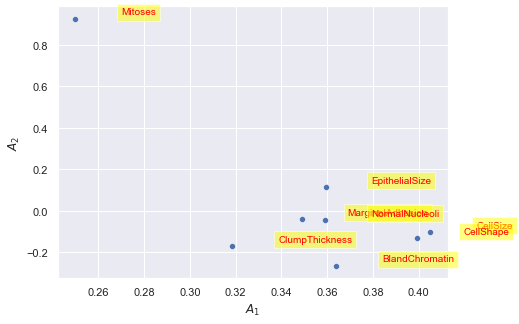

In [21]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

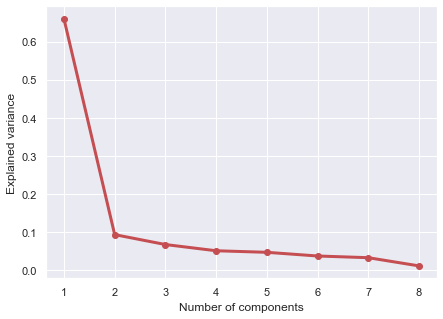

In [22]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

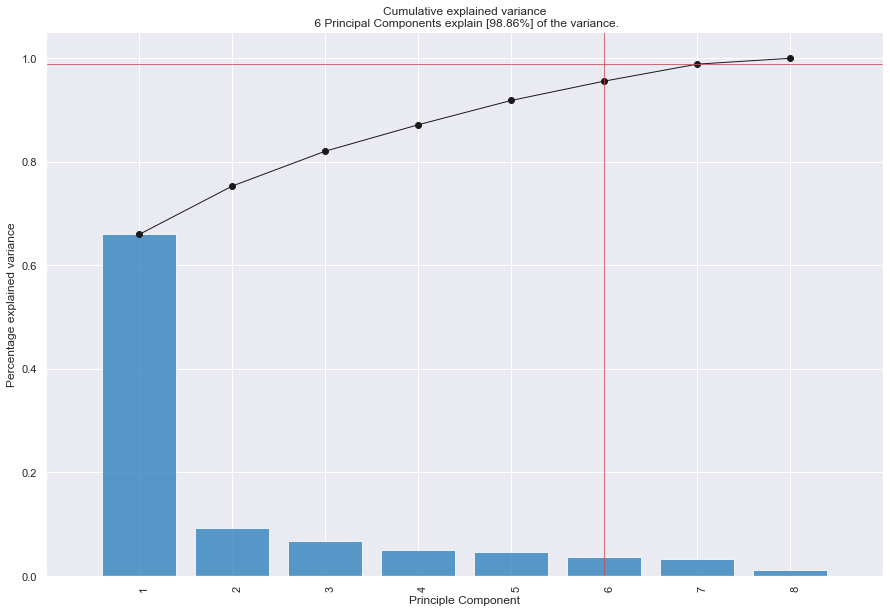

<Figure size 504x360 with 0 Axes>

In [23]:
model.plot();